In [3]:
!pip install yfinance pandas

In [5]:
import pandas as pd
import yfinance as yf
tesla_data = yf.Ticker("TSLA").history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [14]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "lxml") 

tables = soup.find_all("table", class_=re.compile(r"\bhistorical_data_table\b"))

target_table = None
for t in tables:
    th = t.find("th")
    th_text = (th.get_text(" ", strip=True) if th else "").lower()
    if "tesla quarterly revenue" in th_text:
        target_table = t
        break

if target_table is None:
    raise Exception("Nu am găsit tabelul cu header 'Tesla Quarterly Revenue' într-o celulă <th>.")

rows = []
for tr in target_table.find_all("tr"):
    tds = [td.get_text(strip=True) for td in tr.find_all("td")]
    if len(tds) == 2:
        rows.append(tds)

tesla_revenue = pd.DataFrame(rows, columns=["Date", "Revenue"])
tesla_revenue["Revenue"] = (tesla_revenue["Revenue"]
                            .str.replace(r"[\$,]", "", regex=True)
                            .str.strip())
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""].reset_index(drop=True)
tesla_revenue.loc[tesla_revenue.index[-1], "Revenue"] = 27

tesla_revenue.tail()


,Date,Revenue
54,2011-12-31,39
55,2011-09-30,58
56,2011-06-30,58
57,2011-03-31,49
58,2010-12-31,27


In [15]:
import yfinance as yf
gme_data = yf.Ticker("GME").history(period="max")
gme_data.reset_index(inplace=True)
gme_data.to_csv("gme_stock_data.csv", index=False)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [21]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "lxml")

tables = soup.find_all("table", class_=re.compile(r"\bhistorical_data_table\b"))

target_table = None
for t in tables:
    th = t.find("th")
    th_text = (th.get_text(" ", strip=True) if th else "").lower()
    if "gamestop quarterly revenue" in th_text:
        target_table = t
        break

if target_table is None:
    raise Exception("Table with header 'GameStop Quarterly Revenue' not found.")

rows = []
for tr in target_table.find_all("tr"):
    tds = [td.get_text(strip=True) for td in tr.find_all("td")]
    if len(tds) == 2:
        rows.append(tds)

gme_revenue = pd.DataFrame(rows, columns=["Date", "Revenue"])
gme_revenue["Revenue"] = (
    gme_revenue["Revenue"]
    .str.replace(r"[\$,]", "", regex=True)
    .str.strip()
)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""].reset_index(drop=True)
gme_revenue.loc[gme_revenue.index[-1], "Revenue"] = 709

gme_revenue.tail()


,Date,Revenue
55,2011-10-31,1947
56,2011-07-31,1744
57,2011-04-30,2281
58,2011-01-31,3693
59,2010-10-31,709


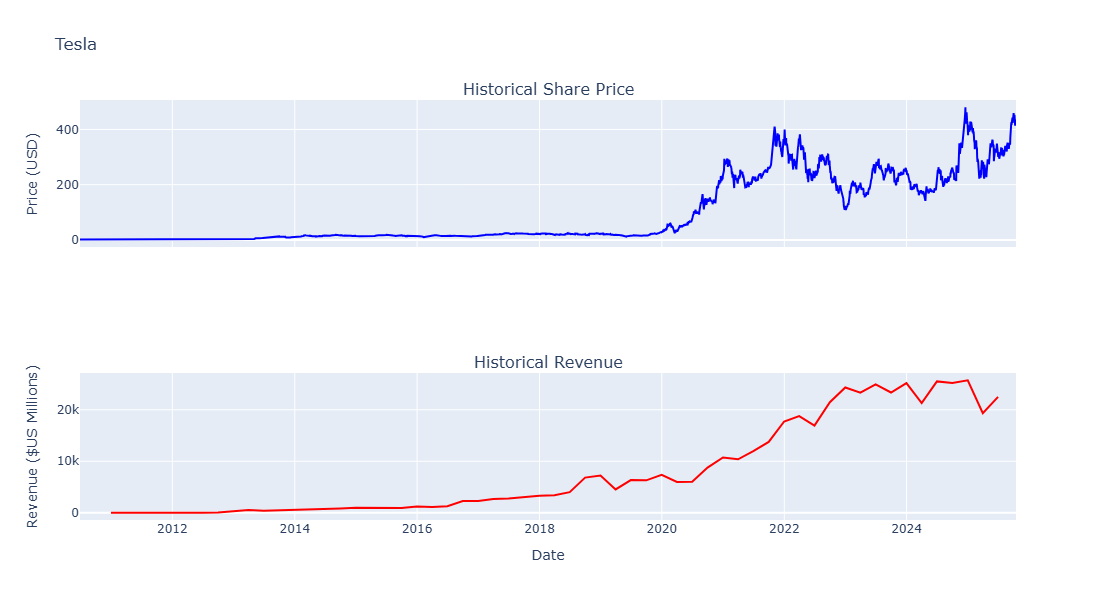

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

tesla_revenue["Revenue"] = (
    tesla_revenue["Revenue"]
    .replace(r"[\$,]", "", regex=True)
    .astype(float)
)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    subplot_titles=("Historical Share Price", "Historical Revenue"),
                    vertical_spacing=0.3)
fig.add_trace(go.Scatter(
    x=tesla_data["Date"],
    y=tesla_data["Close"],
    name="Tesla Share Price",
    line=dict(color='blue')),
    row=1, col=1
)
fig.add_trace(go.Scatter(
    x=tesla_revenue["Date"],
    y=tesla_revenue["Revenue"],
    name="Tesla Revenue",
    line=dict(color='red')),
    row=2, col=1
)
fig.update_layout(
    title_text="Tesla",
    height=600,
    showlegend=False
)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

fig.show()


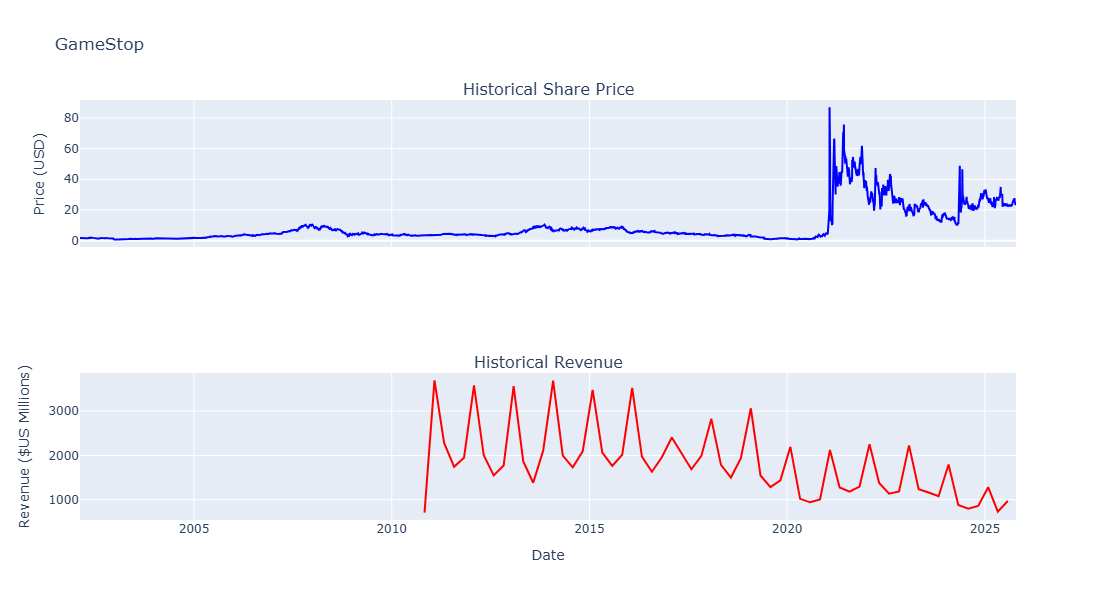

In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

gme_revenue["Revenue"] = (
    gme_revenue["Revenue"]
    .replace(r"[\$,]", "", regex=True)
    .astype(float)
)

gme_data["Date"] = pd.to_datetime(gme_data["Date"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

fig = make_subplots(
    rows=2, cols=1, shared_xaxes=True,
    subplot_titles=("Historical Share Price", "Historical Revenue"),
    vertical_spacing=0.3
)

fig.add_trace(
    go.Scatter(
        x=gme_data["Date"],
        y=gme_data["Close"],
        name="GameStop Share Price",
        line=dict(color='blue')
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=gme_revenue["Date"],
        y=gme_revenue["Revenue"],
        name="GameStop Revenue",
        line=dict(color='red')
    ),
    row=2, col=1
)

fig.update_layout(
    title_text="GameStop",
    height=600,
    showlegend=False
)

fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

fig.show()
